## Funcion de costo para SVM

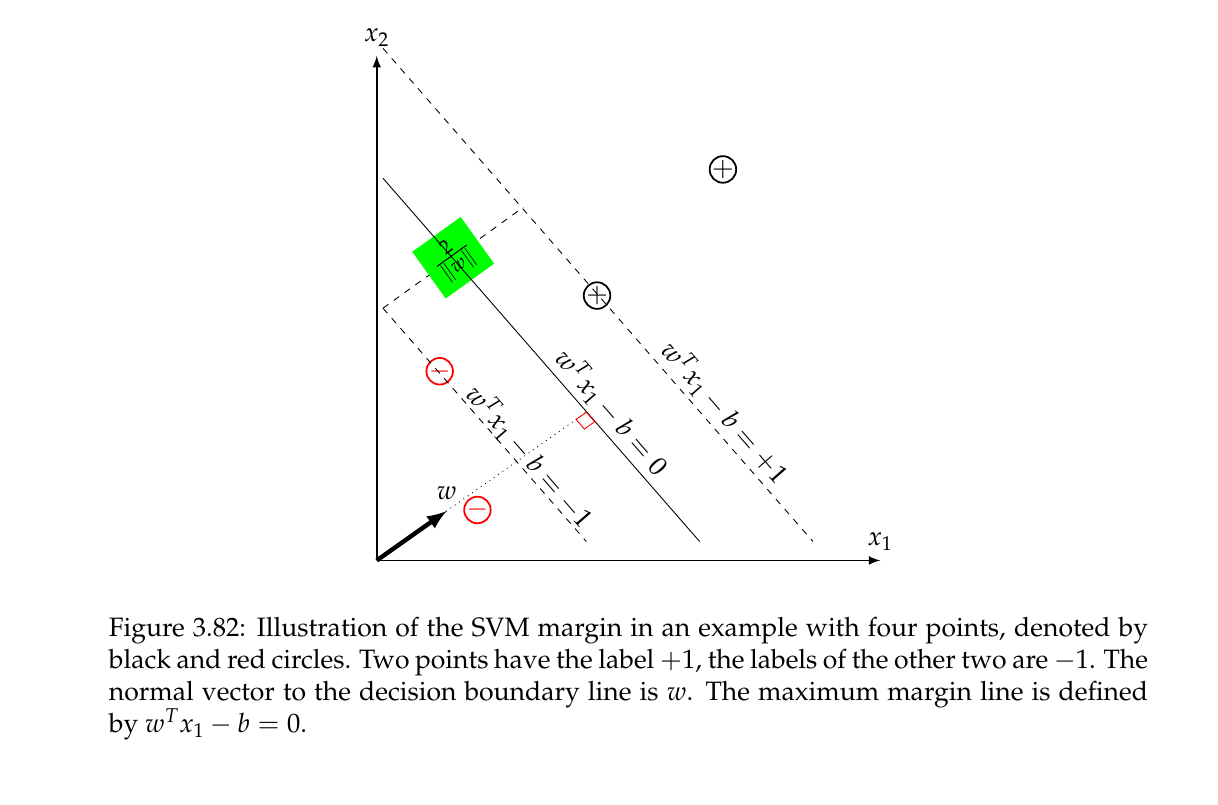

Matematica sencilla en 2D

Una recta $x_2 = a x_1 - b$, donde $a, x_1, x_2, b \in \mathbb{R}$. 


\begin{eqnarray}
x_2 &=& a x_1 - b \\
0 &=& a x_1 - x_2 - b \\
0 &=& \begin{pmatrix}
a \\ -1
\end{pmatrix}^T
\binom{x_1}{x_2} - b,
\end{eqnarray}
donde $a$ es la pendidente de la linea divisoria. 
Se puede generaliza r $\mathbb{R}^n$ con la ecuacion

$$ 0 = w^T x - b $$.

Construyamos dos rectas paralelas al centro y equidistantes del mismo.

$$ \pm \delta = w^T x - b $$, $\delta > 0 $.

Para las cruces "+" que estan a la derecha en la figura de arriba

\begin{eqnarray}
w^T x^{(i)} - b  &>& 0  \quad , \quad y^{(i)} = 1 \\
w^T x^{(i)} - b &<& 0 \quad , \quad y^{(i)} = -1
\end{eqnarray}

Por ejemplo, puntos a una distance $\delta>0$ de la linea central se definen como

\begin{eqnarray}
w^T x^{(i)} - b &=& \delta  \quad , \quad y^{(i)} = 1 \\
 w^T x^{(i)} - b &=& -\delta \quad , \quad y^{(i)} = -1 
\end{eqnarray}

Podemos integrar estas dos ecuaciones en una sola. 

$$ y^{(i)} ( w^T x^{(i)} - b) =  \delta \quad , \quad (1)  $$
donde $y^{(i)}$ solo puede tomar los valores 1 o - 1.

Del ejercicio #### del la seccion de algebra lineal tenemos
que la distancia entre las dos paralelas

$$w^T x - b = \pm \delta  $$    
 
 es


$$\text{el doble del margen} = \frac{2 \delta}{\| w \|}  $$

Por que podemos decir, sin perdida de generalidad que $\delta = 1$.

Si en la ecuacion dividmos por $\delta$

$$\frac{w}{\delta}^T  x - \frac{b}{\delta} = \pm 1 \quad \quad (1) $$

No tengo retriccion sobre $w$ ni sobre $b$. Entonces los podria renombrar

$$ w \leftarrow \frac{w}{\delta} \quad, b \leftarrow \frac{b}{\delta} $$

y retornamos a la ecuacion 1 pero con 1 en vez de delta.

Es como una normalizacion por $\delta$ de la ecuacion.

$$ y^{(i)} (w^T x - b) =  1 $$    

Le problema de **optimizacion** es que el mayor "ancho de calle", es
$$\frac{2}{\| w \|}$$ y queremos que sea tran grande como podamos. Debemos
hallar el maximo de $$\frac{2}{\| w \|}$$ con restricciones. 

Es decir

$$ \text{maximo de } \frac{2}{\| w \|}  \text{  con restricciones  }  y^{(i) (w^T x - b) \ge  1  $$
Este seria un problema de multiplicadores de Lagrange. 

Como estamos ensenados a minimizar y no a maximizar, entonces mejor buscamos
el minimo del inverso, es decir


$$ \text{minimo de } \frac{\| w \| }{2 }  \text{  con restricciones  }  y^{(i)} w^T x - b \ge  1  $$
Los dos problemas son equivalentes. Esta es la funcion de costo para SVM.

Hay una forma de integrar funcion en una sola usando multiplicadores de Lagrange
o mejor
[KKT method](https://en.wikipedia.org/wiki/Karush%E2%80%93Kuhn%E2%80%93Tucker_conditions)

Podriamos minimizar

$$ J(w) = \frac{ \|w \|^2}{2} + C \sum_{i=1}^m ( 1 - y^{(i)}[ w^T x^{(i)} - b])  $$

Donde $C>0$, $C$ actua como un coeficiente de regularizacion. 





## Kernels.
Quisieramos encongrar un "gap" entre los dos bosques, pero que no sea recto. 
Cuando no existe un hiperplano que separe los dos conjuntos de datos completamenete, se dice que el conjuno **no es linealmente separable**.

Entonces para eso usamos los Kernels.


* 1D:

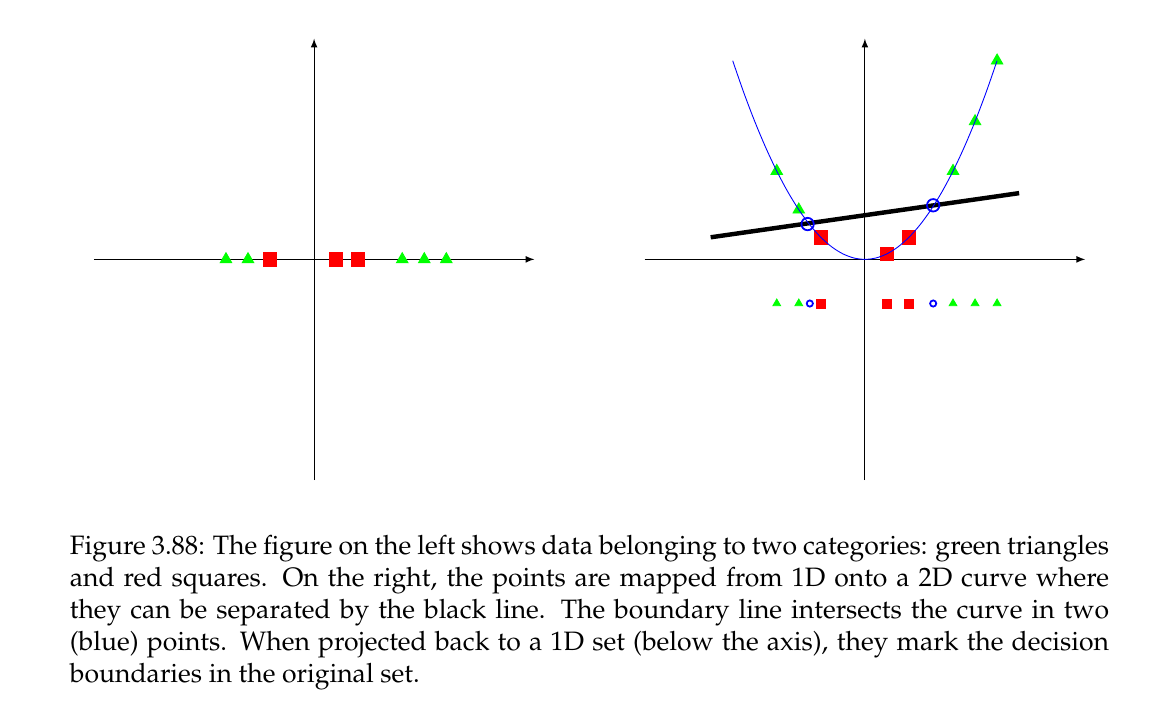

Podemos mapear los puntos $x$ a una parabola $(x, x^2)$ y pasamos de $\mathbb{R}$ a $\mathbb{R}^2$. Es decir:

\begin{eqnarray}
m : \mathbb{R} &\to& \mathbb{R}^2 \\
 x &\mapsto& (x, x^2) 
\end{eqnarray}

Para mejor hacer el trabajo debemos "normalizar" los datos restandoles la media, para que queden centrados. Por que?

La siguiente grafica muestra un ejemplo de datos que no estan normalizados (por la media) todos estan hacia la derecha.

Al mapeo "m" se le llama "kernel". 


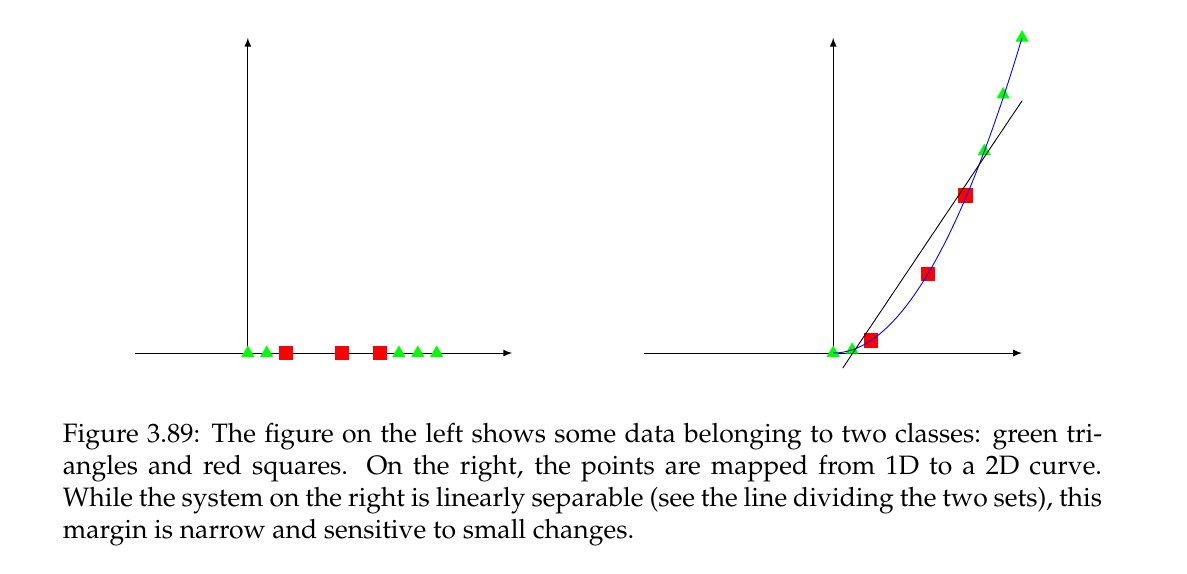

Reucuerde que la noramalizacion por la media esta dada por

$$ x^{(i)} \leftarrow x^{(i)} - \mu $$ para que todos
los puntos queden centrados.

Ejemplo para datos en 2D. 

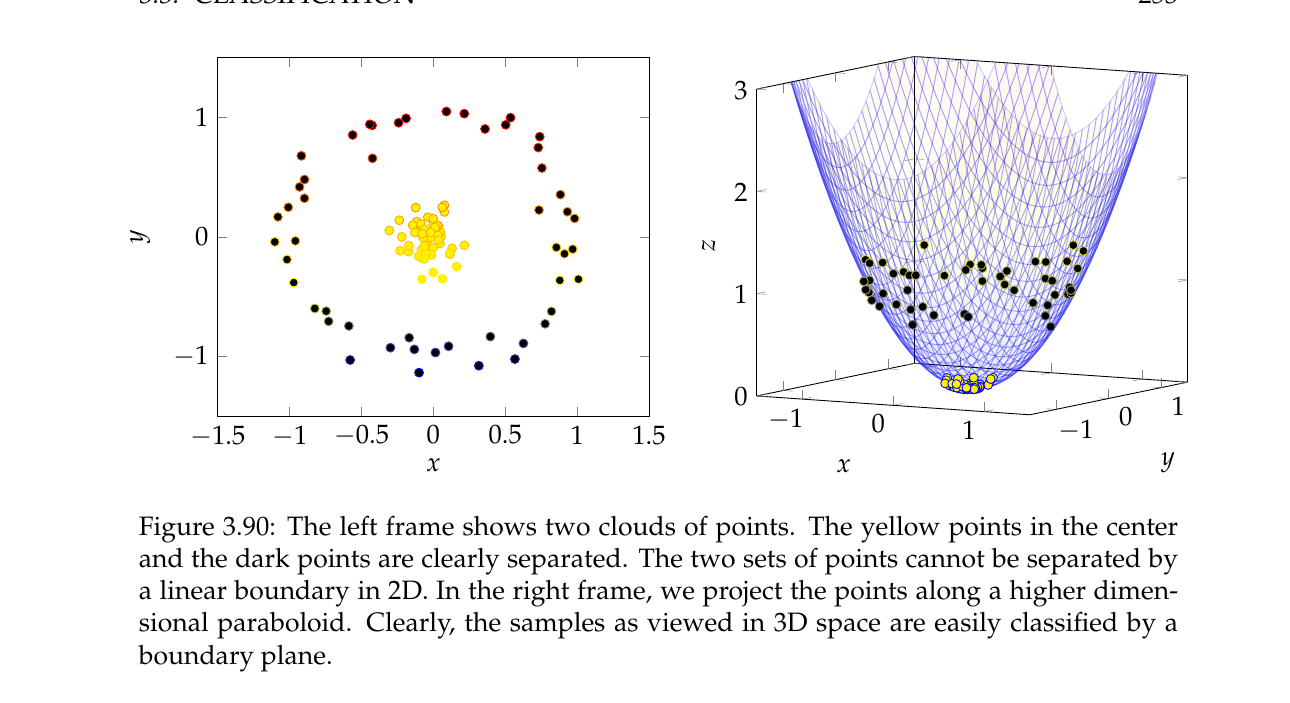

Los puntos en la figura de la izquierda (arriba) no son linealmente separables. No existe un hiperplano que los dividas. 

Un kernel que separar los puntos de la figura por un hiperplano, es decir, que los convierte en linealmente separables es:


\begin{eqnarray}
K: \mathbb{R}^2 &\to& \mathbb{R}^3 \\
    (x_1, x_2) &\mapsto& (x_1, x^2, x_1^2 + x_2^2)
\end{eqnarray}

El metodo de kernels tiene las siguientes propiedades y algoritmo

* El kernel convierte un conjunto que no es linealmente separable en otro que si lo es. Moviendo los puntos a una dimension mayor , como mostramos en los ejemplos.

* Una vez los puntos son linealmente separables se puede usar un SVM regular que encuentra el hiperplano de separacion.

* La interseccion del hiperplano de separacion con la hiper-superficie que representa el kernel es el camino de division (que no es recto). Este camino se proyecta al espacio inicial y se convierte en el **decision boundary** (la frontera de decision).

Un ejemplo es la siguiente figura obtenida con un kernel gaussiano.



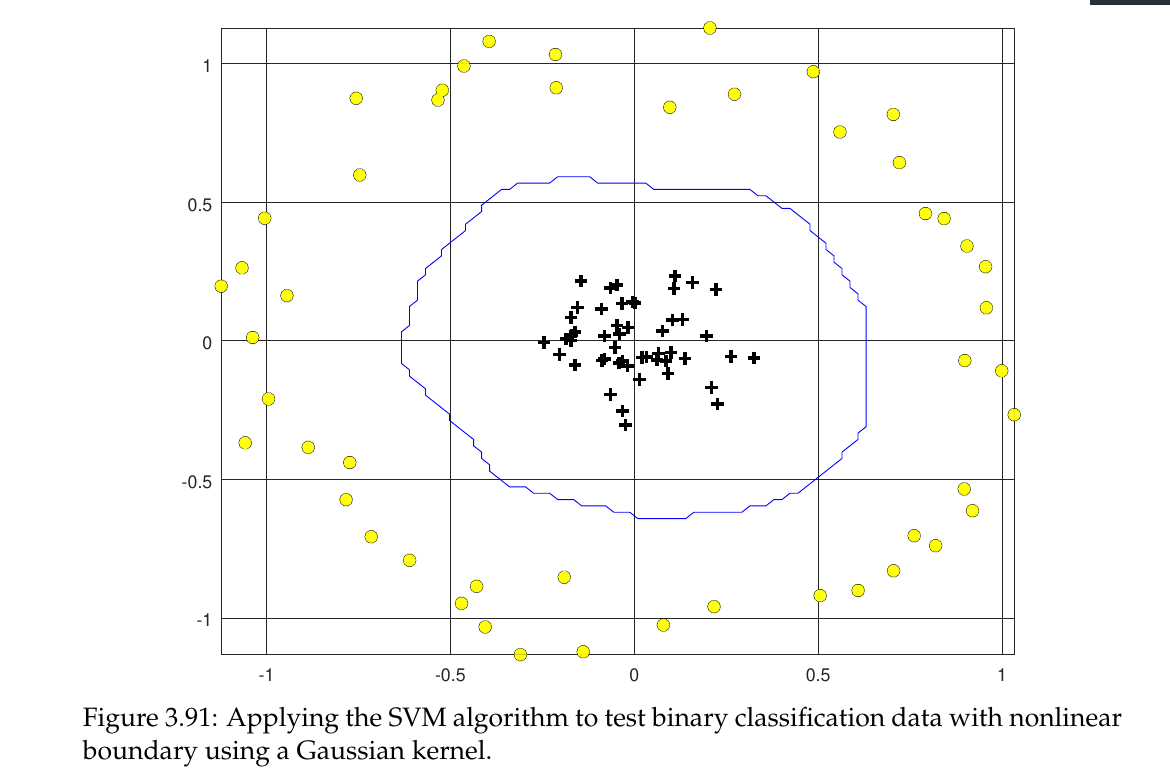

## La solucion de SVM usando multiplicadores de Lagrange.

Tenemos una coleccion de puntos $x^{(i)}$ y etiquetas $y^{(i)}$, 
queremos resolver el siguiente problema:


\begin{eqnarray}
\text{minimizar } J(w) &=&  \frac{\| w \|^2}{2}  \\
\text{retringido a} y_i ( w^T x_i - b) &\ge& 1 \quad i=1,2, \cdots, m 
\end{eqnarray}

El problema de multiplicadores de Lagrange en general se formula como

\begin{eqnarray}
\min f(\theta) && \quad , \quad \text{sujeto a}  \\
g_i(x) &\ge& 0 
\end{eqnarray}
y la solucion a este problema se halla formando la ecuacion de Largrange

$$L(\theta, \lambda) = f(\theta ) - \sum_i \lambda_i g_i (\theta) $$
la cual se debe minimizar obteniendo el gradiente e igualandolo a cero.


En nuestro caso, la funcion de Lagrange es


$$L(w, b , \lambda) = \frac12 \| w \|^2 - \sum_i \lambda_i [ y_i(w \cdot x_i - b) - 1]  $$

Debemos hallar el gradiente e igularlo a cero.

$$\nabla L(w, b , \lambda) = \nabla \left [ \frac12 \| w \|^2 - \sum_i \lambda_i [ y_i(w \cdot x_i - b) - 1]  \right ] = 0 $$

Vamos por partes

$$ \frac{\partial }{\partial w_j} \left (   \frac12 \| w \|^2  \right ) = \frac{\partial }{\partial w_j} \left (   \frac12 \sum_i w_i^2  \right ) = \frac12 2 \sum_i \delta_{ij} w_i = w_j  $$

Ahora,

\begin{eqnarray}
 \frac{\partial }{\partial w_j}  \left ( \sum_i \lambda_i [ y_i(w \cdot x_i - b) - 1] 
     \right ) &=&  \frac{\partial }{\partial w_j}  \left ( \sum_i \lambda_i \left [ y_i \left ( \sum_k w_k (x_i)_k - b \right )  - 1 \right ] 
     \right ) \\
     &=& \sum_i \lambda_i \left [  y_i  \left ( \sum_k \delta_{kj} (x_i)_k  \right )  \right ]  \\
     &=& \sum_i \lambda_i \left [  y_i (x_i)_j \right ]
\end{eqnarray}
donde $(x_i)_k$ es la componente $k$ del vector $x_i$. 


Juntando las dos

$$ \nabla_w L(w, b, \lambda) = w_j - \sum_i \lambda_i y_i (x_i)_j$$

o de forma vectorial

$$ w = \sum_i \lambda_i y_i x_i  \quad , \quad (2)  $$

Falta la derivada con respecto al "bias" (intercepto b).


$$  \frac{\partial}{\partial b} \left (  \sum_i \lambda_i [ y_i(w \cdot x_i - b) - 1] \right )= - \sum_i \lambda_i y_i = 0  $$

Es decir

$$ \sum_i \lambda_i y_i = 0$$

Enseguida construimos como queda $L(\lambda)$. 

A las 9:00 am.


$$L(w, b , \lambda) = \frac12 \| w \|^2 - \sum_i \lambda_i [ y_i(w \cdot x_i - b) - 1]  $$


\begin{eqnarray}
L(w, b, \lambda) &=& \frac12 \left (  \sum_i \lambda_i y_i x_i \right ) \cdot  \left (  \sum_j \lambda_j y_j x_j \right ) - \sum_i \lambda_i \left [y_i \left (
  \sum_j \lambda_j y_j x_j \cdot x_i - b   \right ) - 1 
    \right ] \\
    &=& \frac12 \sum_i \sum_j \lambda_i \lambda_j y_i y_j x_i \cdot x_j - \sum_i \sum_j \lambda_i y_i \lambda_j y_j x_i \cdot x_j + \sum_i \lambda_i y_i b + \sum_i \lambda_i  \\
    &=&  \frac12 \sum_i \sum_j \lambda_i \lambda_j y_i y_j x_i \cdot x_j   - \sum_i \sum_j \lambda_i \lambda_j  y_i y_j x_i \cdot x_j  + b \times 0  + \sum_i \lambda_i \\
    &=& -\frac12 \sum_i \sum_j \lambda_i \lambda_j y_i y_j x_i \cdot x_j + \sum_i \lambda_i \quad , \quad \text{sujeto a}  \sum_i \lambda_i y_i = 0 
\end{eqnarray}

En definitiva encontramos:


\begin{eqnarray}
L(w, b, \lambda) = -\frac12 \sum_i \sum_j \lambda_i \lambda_j y_i y_j x_i \cdot x_j + \sum_i \lambda_i \quad , \quad \text{sujeto a}  \sum_i \lambda_i y_i = 0
\quad , \quad (3) 
\end{eqnarray}

Lo que hicimos fue convertir un problema de multiplicadores de Lagrange en otro de forma cuadratica. Todavia tendriamos que resolver este problema para encontar
$\lambda$ y una vez con $\lambda$, podemos reemplazarlo en la ecuacion (2) y encontrar $w$. Yo dejo como ejercicio encontrar $b$. 

Ahora para hallar $\lambda$ debemos resolver el problema lineal


$$ \frac{\partial L}{\partial \lambda} = 0  $$
Este sistema es lineal. Al problema (3) se le conoce como el **dual**


## Thee kernel trick.

Vemos que el mapeo (kernel) de la ecuacion (3) mediante la funcion $\Phi$ que antes llamos $m$ y despues $K$.

\begin{eqnarray}
L(w, b, \lambda) = -\frac12 \sum_i \sum_j \lambda_i \lambda_j y_i y_j \Phi(x_i) \cdot \Phi(x_j) + \sum_i \lambda_i \quad , \quad \text{sujeto a}  \sum_i \lambda_i y_i = 0
\quad , \quad (3) 
\end{eqnarray}

Estas operaciones $\Phi(x_i) \cdot \Phi(x_j)$ pueden ser costosass cuando $\Phi$ cae en un espacio de muchas dimensionees. El kernel se define como


$$k(x_i, x_j) = \Phi(x_i) \cdot \Phi(x_j) $$

El "kernel trick" busca la forma de calcular esto rapidamente. El kernel trick se le atribuye a (Isabel Guyon)(https://en.wikipedia.org/wiki/Isabelle_Guyon) .

Esto hace que el SVM sea mas eficiente y en parte contribuyo que el SVM se volviera una herramienta muy importante en ML.

Vamos a ver en que consiste en kernel trick con ejemplos.

* Tomemos $n=2$, y consideremos el siguiente mapeo.

\begin{eqnarray}
\Phi: \mathbb{R}^2 &\to& \mathbb{R}^2 \\
(x_1, x_2) &\mapsto& \Phi(x_1, x_2) = ( x_1^2 , x_2^2, \sqrt{2} x_1 x_2) 
\end{eqnarray}

La idea es probar que $k(x,y) = (x \cdot y)^2$ es tal que
$k(x,y) = \Phi(x) \cdot \Phi(y)$ pero mucho mas veloz.

Veamos:

Tomemos $x=(x_1, x_2)$, $y=(y_1, y_2)$, entoncess

$$k(x,y) = (x \cdot y)^2 = \left ( \sum_{i=1}^2 x_i y_i \right )^2 = x_1^2 y_1^2 + 2 x_1 x_2 y_1 y_2 + x_2^2 y_2^2  $$

En comparacion

$$ \Phi(x) \cdot \Phi(y) = (x_1^2, x_2^2, \sqrt{2} x_1 x_2) \cdot (y_1^2, y_2^2, \sqrt{2} y_1 y_2) = x_1^2 y_1^2 + 2 x_1 x_2 y_1 y_2 + x_2^2 y_2^2  $$

Donde esta la ganancia.

Contemos operaciones:

    * en el caso de $k(x,y)$: 1 suma, dos multiplicaciones y un cuadrado.
    * en el caso de $\Phi(x) \cdot \Phi(y)$: 5 multiplicaciones y 2 sumas.

El  $k(x,y)$ es mas rapido.

* Para $n=3$. Definimos:


\begin{eqnarray}
\Phi: \mathbb{R}^3 &\to& \mathbb{R}^6 \\
(x_1, x_2, x_3) &\mapsto& \Phi(x_1, x_2, x_3) = (x_1^2, x_2^2, x_3^2, \sqrt{2} x_1 x_2, \sqrt{2} x_1 x_3, \sqrt{2} x_2 x_3) 
\end{eqnarray}
La idea es reemplazar $\Phi(x) \cdot \Phi(y)$, por


$k(x,y) = (x \cdot y)^2$.
Es decir

$$k(x,y) = (x \cdot y)^2 = \left (  \sum_{i=1}^3 x_i y_i \right )^2 = \sum_{i=1}^3 \sum_{j=1}^3 x_i x_j y_i y_j  $$.

De otro lado

$$ \Phi(x) \cdot \Phi(y) =  (x_1^2, x_2^2, x_3^2, \sqrt{2} x_1 x_2, \sqrt{2} x_1 x_3, \sqrt{2} x_2 x_3) \cdot (y_1^2, y_2^2, y_3^2, \sqrt{2} y_1 y_2, \sqrt{2} y_1 y_3, \sqrt{2} y_2 y_3) = \sum_{i=1}^3 \sum_{j=1}^3 x_i x_j y_i y_j $$

Los dos producen lo mismo. Calculemos numero de operaciones:

    * Usando el kernel. $k(x,y)$. 3 multiplicaciones, dos sumas, un cuadrado
    * Usando $\Phi(x) \cdot \Phi(y)$: 12 multiplicaciones, 5 sumas, 6 cuadrados.



En las notas de clase hay otros ejemplos. Hoy solo vemos, como ultimo ejemplo, el kernel gaussiano.



La definicion del kernel gaussiano es:

$$ k(x_i, x_j) = \mathrm{e}^{- \frac{(x_i - x_j)^2}{2 \sigma^2}}$$

Esto es un traslado de la distancia a travez de una gausiana,
Por que distancia?


$$ (x_i - x_j)^2 = \| x_i - x_j \|^2 = (x_i - x_j)^T (x_i -x_j) = \langle x_i - x_j, x_i - x_j \rangle = (x_i - x_j) \cdot (x_i - x_j) $$

Vamos a ver cual es el "mapping" $\Phi$ correspondiente a este kernel.

Para eso usamos la expansion de Taylor

$$ \mathrm{e}^{\theta} = 1 + \theta + \frac{\theta^2}{2!} + \cdots + \frac{\theta^n}{n!} + \cdots $$

El caso mas simple corresponde a $x_i, x_j \in \mathbb{R}$. 

\begin{eqnarray}
\mathrm{e}^{-\frac{(x_i - x_j)^2}{2}} &=& \mathrm{e}^{-\frac{x_i^2 + x_j^2}{2 \sigma^2}} \mathrm{e}^{ \frac{x_i x_j}{\sigma^2}} \\
&=&  \mathrm{e}^{-\frac{x_i^2 + x_j^2}{2 \sigma^2}} \left ( 1 + 
\frac{x_i x_j}{\sigma^2} + \frac{1}{2!} \left ( \frac{x_i x_j}{\sigma^2}\right )^2 + \frac{1}{3!} \left ( \frac{x_i x_j}{\sigma^2}\right )^3 +
\cdots \frac{1}{n!} \left ( \frac{x_i x_j}{\sigma^2}\right )^n + \cdots
    \right ) \\
    &=& \mathrm{e}^{-\frac{x_i^2 + x_j^2}{2 \sigma^2}}
    \left ( (1) (1) + \frac{x_i}{\sigma} \frac{x_j}{\sigma} +  \frac{x_i^2}{\sqrt{2!} \sigma^2}  \frac{x_j^2}{\sqrt{2!} \sigma^2} + \cdots + 
   \frac{x_i^n}{\sqrt{n!} \sigma^n}  \frac{x_j^n}{\sqrt{n!} \sigma^m} 
        \right ) 
\end{eqnarray}

De aca se ve que

$$\Phi(x) = \mathrm{e}^{-\frac{x^2}{2 \sigma^2}} 
\left (  1, \frac{x}{\sigma} , \cdots,  \frac{x^n}{\sqrt{n! \sigma^n}}   \right )$$
